In [1]:
# Comment the following cell if running through the command :
# papermill runnable_HPO.ipynb executed_HPO.ipynb -f params_for_HPO.yaml --kernel jupyter.jax_env

In [2]:
global_seed = 88
save_results = False
# Parameters specfific to the benchmark
benchmark_settings = {"benchmark_name" : "pMNIST_via_torch",
                      "difficulty" : "standard",
                      "num_tasks" : 5,
                      "train_percentage" : 0.8,
                      "num_val_benchmarks" : 3,
                      "batch_size" : 128}

# Parameters specific to the method
method_settings = {"method_name" : "GroHess",
                   "grow_from" : "output",
                   "hessian_percentile" : 95,
                   "grad_percentile" : 95,
                   "num_inputs" : 28*28,
                   "num_hidden_root" : 100,
                   "num_outputs" : 10,
                   "loss_name" : "CE",
                   "optimizer_name" : "Adam"}

# Parameters specific to HPO
HPO_settings = {"HPO_name" : "greedy_HPO",
                "n_trials" : 5,
                "lr" : (5e-5, 2e-3),
                "num_epochs" : (2, 6),
                "ewc_lambda" : None,# (200,1000),
                "lwf_alpha" : None, #(0.1, 0.9),
                "lwf_temperature" : None} #(1, 3)

# Parameters specific to the visualization
visualization_settings = {"savefig" : False,
                          "visualize_accs_matrix" : True,
                          "visualize_avg_acc_curve" : True,
                          "visualize_best_params" : True,
                          "visualize_val_accs_matrix" : True,
                          "visualize_accuracy_through_benchmarks" : True,
                          "visualize_violin" : True}

In [3]:
import sys
import os
import numpy as np
import warnings
warnings.filterwarnings('ignore')

sys.path.append("Methods/" + method_settings["method_name"])
sys.path.append("HPO_lib")
sys.path.append("HPO_lib/benchmark_loaders")


path = os.path.dirname(os.path.abspath("__file__"))
data_path = path + "/data"

## Imports

In [4]:
from HPO_lib.abstract_torch import get_device
from HPO_lib.get_benchmarks import get_benchmarks
from HPO_lib.run_HPO import run_HPO
from HPO_lib.validation import validate
from HPO_lib.visualize import visualize_HPO, visualize_validation

In [5]:
device = get_device(1)

## Get benchmarks

In [6]:
benchmarks_list = get_benchmarks(benchmark_settings, global_seed)

## Run HPO

In [7]:
test_accs_matrix, best_params_list, model = run_HPO(HPO_settings, method_settings, benchmark_settings, benchmarks_list[0], device, global_seed)

[I 2024-07-09 16:09:24,297] A new study created in memory with name: Search number 1



--------------------------------------------------
LEARNING TASK 1


100%|██████████| 4/4 [00:14<00:00,  3.51s/it]
[I 2024-07-09 16:09:41,463] Trial 0 finished with value: 94.94534188034193 and parameters: {'lr': 0.0013127245462383958, 'num_epochs': 4}. Best is trial 0 with value: 94.94534188034193.
100%|██████████| 6/6 [00:20<00:00,  3.50s/it]
[I 2024-07-09 16:10:05,661] Trial 1 finished with value: 95.46641025641031 and parameters: {'lr': 0.001080265691296867, 'num_epochs': 6}. Best is trial 1 with value: 95.46641025641031.
100%|██████████| 5/5 [00:17<00:00,  3.50s/it]
[I 2024-07-09 16:10:26,381] Trial 2 finished with value: 95.68987179487185 and parameters: {'lr': 0.0014149828218016016, 'num_epochs': 5}. Best is trial 2 with value: 95.68987179487185.
  0%|          | 0/5 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 20%|██        | 1/5 [00:03<00:14,  3.62s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 40%|████      | 2/5 [00:07<00:10,  3.54s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 60%|██████    | 3/5 [00:10<00:06,  3.50s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 80%|████████  | 4/5 [00:14<00:03,  3.49s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


100%|██████████| 5/5 [00:17<00:00,  3.50s/it]
[I 2024-07-09 16:10:49,045] A new study created in memory with name: Search number 2



--------------------------------------------------
LEARNING TASK 2


100%|██████████| 4/4 [00:13<00:00,  3.47s/it]
[I 2024-07-09 16:11:09,175] Trial 0 finished with value: 93.71643162393167 and parameters: {'lr': 0.0013127245462383958, 'num_epochs': 4}. Best is trial 0 with value: 93.71643162393167.
100%|██████████| 6/6 [00:20<00:00,  3.48s/it]
[I 2024-07-09 16:11:36,283] Trial 1 finished with value: 93.30773504273509 and parameters: {'lr': 0.001080265691296867, 'num_epochs': 6}. Best is trial 0 with value: 93.71643162393167.
100%|██████████| 5/5 [00:17<00:00,  3.46s/it]
[I 2024-07-09 16:11:59,810] Trial 2 finished with value: 93.22222222222227 and parameters: {'lr': 0.0014149828218016016, 'num_epochs': 5}. Best is trial 0 with value: 93.71643162393167.
  0%|          | 0/4 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 25%|██▌       | 1/4 [00:03<00:10,  3.47s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 50%|█████     | 2/4 [00:06<00:06,  3.47s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 75%|███████▌  | 3/4 [00:10<00:03,  3.47s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


100%|██████████| 4/4 [00:13<00:00,  3.47s/it]
[I 2024-07-09 16:12:18,844] A new study created in memory with name: Search number 3



--------------------------------------------------
LEARNING TASK 3


100%|██████████| 4/4 [00:13<00:00,  3.45s/it]
[I 2024-07-09 16:12:41,993] Trial 0 finished with value: 87.47659544159542 and parameters: {'lr': 0.0013127245462383958, 'num_epochs': 4}. Best is trial 0 with value: 87.47659544159542.
100%|██████████| 6/6 [00:20<00:00,  3.46s/it]
[I 2024-07-09 16:13:12,100] Trial 1 finished with value: 88.69206552706555 and parameters: {'lr': 0.001080265691296867, 'num_epochs': 6}. Best is trial 1 with value: 88.69206552706555.
100%|██████████| 5/5 [00:17<00:00,  3.47s/it]
[I 2024-07-09 16:13:38,752] Trial 2 finished with value: 83.91870370370371 and parameters: {'lr': 0.0014149828218016016, 'num_epochs': 5}. Best is trial 1 with value: 88.69206552706555.
  0%|          | 0/6 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 17%|█▋        | 1/6 [00:03<00:17,  3.46s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 33%|███▎      | 2/6 [00:06<00:13,  3.47s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 50%|█████     | 3/6 [00:10<00:10,  3.47s/it]

In and out sizes :
fc1 : in = 784, out = 120
fc2 : in = 120, out = 100
fc3 : in = 100, out = 10


 67%|██████▋   | 4/6 [00:13<00:06,  3.46s/it]

In and out sizes :
fc1 : in = 784, out = 120
fc2 : in = 120, out = 100
fc3 : in = 100, out = 10


 83%|████████▎ | 5/6 [00:17<00:03,  3.45s/it]

In and out sizes :
fc1 : in = 784, out = 120
fc2 : in = 120, out = 100
fc3 : in = 100, out = 10


100%|██████████| 6/6 [00:20<00:00,  3.46s/it]
[I 2024-07-09 16:14:04,676] A new study created in memory with name: Search number 4



--------------------------------------------------
LEARNING TASK 4


100%|██████████| 4/4 [00:13<00:00,  3.46s/it]
[I 2024-07-09 16:14:30,950] Trial 0 finished with value: 85.28733974358975 and parameters: {'lr': 0.0013127245462383958, 'num_epochs': 4}. Best is trial 0 with value: 85.28733974358975.
100%|██████████| 6/6 [00:20<00:00,  3.47s/it]
[I 2024-07-09 16:15:04,236] Trial 1 finished with value: 84.05691239316239 and parameters: {'lr': 0.001080265691296867, 'num_epochs': 6}. Best is trial 0 with value: 85.28733974358975.
100%|██████████| 5/5 [00:17<00:00,  3.46s/it]
[I 2024-07-09 16:15:33,991] Trial 2 finished with value: 84.44024572649575 and parameters: {'lr': 0.0014149828218016016, 'num_epochs': 5}. Best is trial 0 with value: 85.28733974358975.
  0%|          | 0/4 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 120
fc2 : in = 120, out = 100
fc3 : in = 100, out = 10


 25%|██▌       | 1/4 [00:03<00:10,  3.47s/it]

In and out sizes :
fc1 : in = 784, out = 120
fc2 : in = 120, out = 100
fc3 : in = 100, out = 10


 50%|█████     | 2/4 [00:06<00:06,  3.47s/it]

In and out sizes :
fc1 : in = 784, out = 167
fc2 : in = 167, out = 100
fc3 : in = 100, out = 10


 75%|███████▌  | 3/4 [00:10<00:03,  3.48s/it]

In and out sizes :
fc1 : in = 784, out = 167
fc2 : in = 167, out = 100
fc3 : in = 100, out = 10


100%|██████████| 4/4 [00:13<00:00,  3.48s/it]
[I 2024-07-09 16:15:53,069] A new study created in memory with name: Search number 5



--------------------------------------------------
LEARNING TASK 5


100%|██████████| 4/4 [00:13<00:00,  3.36s/it]
[I 2024-07-09 16:16:22,077] Trial 0 finished with value: 80.02926495726499 and parameters: {'lr': 0.0013127245462383958, 'num_epochs': 4}. Best is trial 0 with value: 80.02926495726499.
100%|██████████| 6/6 [00:20<00:00,  3.34s/it]
[I 2024-07-09 16:16:58,205] Trial 1 finished with value: 77.2824871794872 and parameters: {'lr': 0.001080265691296867, 'num_epochs': 6}. Best is trial 0 with value: 80.02926495726499.
100%|██████████| 5/5 [00:16<00:00,  3.32s/it]
[I 2024-07-09 16:17:30,477] Trial 2 finished with value: 77.66776068376069 and parameters: {'lr': 0.0014149828218016016, 'num_epochs': 5}. Best is trial 0 with value: 80.02926495726499.
  0%|          | 0/4 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 167
fc2 : in = 167, out = 119
fc3 : in = 119, out = 10


 25%|██▌       | 1/4 [00:03<00:10,  3.35s/it]

In and out sizes :
fc1 : in = 784, out = 167
fc2 : in = 167, out = 119
fc3 : in = 119, out = 10


 50%|█████     | 2/4 [00:06<00:06,  3.33s/it]

In and out sizes :
fc1 : in = 784, out = 232
fc2 : in = 232, out = 119
fc3 : in = 119, out = 10


 75%|███████▌  | 3/4 [00:09<00:03,  3.32s/it]

In and out sizes :
fc1 : in = 784, out = 232
fc2 : in = 232, out = 119
fc3 : in = 119, out = 10


100%|██████████| 4/4 [00:13<00:00,  3.33s/it]


## Visualize results

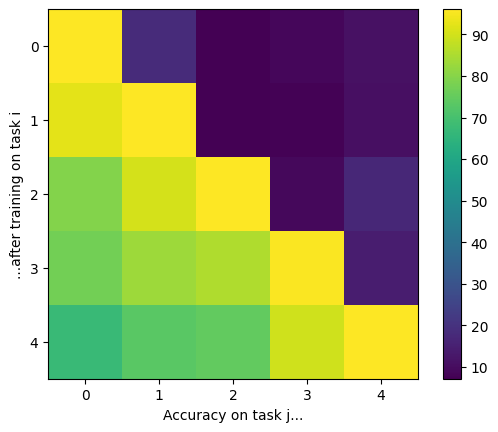

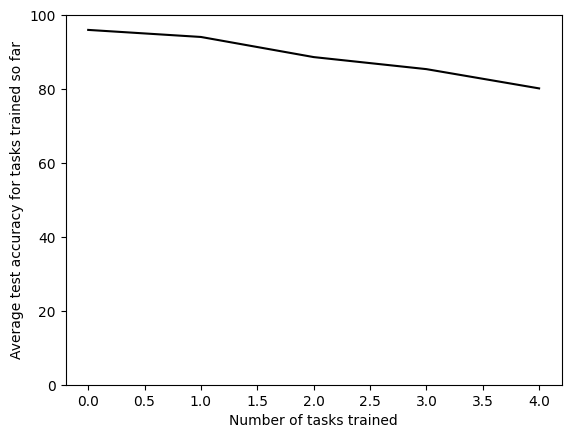

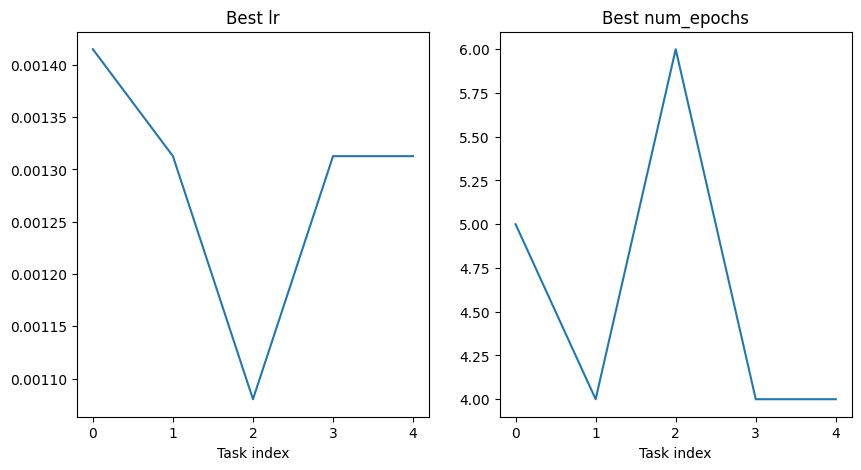

In [8]:
visualize_HPO(test_accs_matrix, best_params_list, visualization_settings, HPO_settings, method_settings, benchmark_settings)

## Validate

In [9]:
val_accs_matrix = validate(benchmarks_list, benchmark_settings, method_settings, best_params_list, device, global_seed)


BENCHMARK 0

--------------------------------------------------
LEARNING TASK 1


  0%|          | 0/5 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 20%|██        | 1/5 [00:03<00:13,  3.34s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 40%|████      | 2/5 [00:06<00:09,  3.33s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 60%|██████    | 3/5 [00:10<00:06,  3.34s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 80%|████████  | 4/5 [00:13<00:03,  3.35s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


100%|██████████| 5/5 [00:16<00:00,  3.34s/it]



--------------------------------------------------
LEARNING TASK 2


  0%|          | 0/4 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 25%|██▌       | 1/4 [00:03<00:10,  3.40s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 50%|█████     | 2/4 [00:06<00:06,  3.37s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 75%|███████▌  | 3/4 [00:10<00:03,  3.35s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


100%|██████████| 4/4 [00:13<00:00,  3.36s/it]



--------------------------------------------------
LEARNING TASK 3


  0%|          | 0/6 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 128
fc2 : in = 128, out = 100
fc3 : in = 100, out = 10


 17%|█▋        | 1/6 [00:03<00:16,  3.32s/it]

In and out sizes :
fc1 : in = 784, out = 128
fc2 : in = 128, out = 100
fc3 : in = 100, out = 10


 33%|███▎      | 2/6 [00:06<00:13,  3.31s/it]

In and out sizes :
fc1 : in = 784, out = 191
fc2 : in = 191, out = 100
fc3 : in = 100, out = 10


 50%|█████     | 3/6 [00:10<00:10,  3.34s/it]

In and out sizes :
fc1 : in = 784, out = 191
fc2 : in = 191, out = 100
fc3 : in = 100, out = 10


 67%|██████▋   | 4/6 [00:13<00:06,  3.34s/it]

In and out sizes :
fc1 : in = 784, out = 191
fc2 : in = 191, out = 100
fc3 : in = 100, out = 10


 83%|████████▎ | 5/6 [00:16<00:03,  3.33s/it]

In and out sizes :
fc1 : in = 784, out = 191
fc2 : in = 191, out = 100
fc3 : in = 100, out = 10


100%|██████████| 6/6 [00:20<00:00,  3.34s/it]



--------------------------------------------------
LEARNING TASK 4


  0%|          | 0/4 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 191
fc2 : in = 191, out = 100
fc3 : in = 100, out = 10


 25%|██▌       | 1/4 [00:03<00:10,  3.35s/it]

In and out sizes :
fc1 : in = 784, out = 191
fc2 : in = 191, out = 100
fc3 : in = 100, out = 10


 50%|█████     | 2/4 [00:06<00:06,  3.35s/it]

In and out sizes :
fc1 : in = 784, out = 191
fc2 : in = 191, out = 100
fc3 : in = 100, out = 10


 75%|███████▌  | 3/4 [00:10<00:03,  3.34s/it]

In and out sizes :
fc1 : in = 784, out = 191
fc2 : in = 191, out = 100
fc3 : in = 100, out = 10


100%|██████████| 4/4 [00:13<00:00,  3.34s/it]



--------------------------------------------------
LEARNING TASK 5


  0%|          | 0/4 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 191
fc2 : in = 191, out = 100
fc3 : in = 100, out = 10


 25%|██▌       | 1/4 [00:03<00:10,  3.34s/it]

In and out sizes :
fc1 : in = 784, out = 191
fc2 : in = 191, out = 100
fc3 : in = 100, out = 10


 50%|█████     | 2/4 [00:06<00:06,  3.34s/it]

In and out sizes :
fc1 : in = 784, out = 191
fc2 : in = 191, out = 100
fc3 : in = 100, out = 10


 75%|███████▌  | 3/4 [00:10<00:03,  3.35s/it]

In and out sizes :
fc1 : in = 784, out = 191
fc2 : in = 191, out = 100
fc3 : in = 100, out = 10


100%|██████████| 4/4 [00:13<00:00,  3.35s/it]



BENCHMARK 1

--------------------------------------------------
LEARNING TASK 1


  0%|          | 0/5 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 20%|██        | 1/5 [00:03<00:13,  3.38s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 40%|████      | 2/5 [00:06<00:10,  3.36s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 60%|██████    | 3/5 [00:10<00:06,  3.35s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 80%|████████  | 4/5 [00:13<00:03,  3.35s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


100%|██████████| 5/5 [00:16<00:00,  3.35s/it]



--------------------------------------------------
LEARNING TASK 2


  0%|          | 0/4 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 25%|██▌       | 1/4 [00:03<00:09,  3.32s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 50%|█████     | 2/4 [00:06<00:06,  3.32s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 75%|███████▌  | 3/4 [00:09<00:03,  3.31s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


100%|██████████| 4/4 [00:13<00:00,  3.31s/it]



--------------------------------------------------
LEARNING TASK 3


  0%|          | 0/6 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 17%|█▋        | 1/6 [00:03<00:16,  3.35s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 33%|███▎      | 2/6 [00:06<00:13,  3.34s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 50%|█████     | 3/6 [00:10<00:10,  3.34s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 67%|██████▋   | 4/6 [00:13<00:06,  3.34s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 83%|████████▎ | 5/6 [00:16<00:03,  3.34s/it]

In and out sizes :
fc1 : in = 784, out = 137
fc2 : in = 137, out = 100
fc3 : in = 100, out = 10


100%|██████████| 6/6 [00:20<00:00,  3.34s/it]



--------------------------------------------------
LEARNING TASK 4


  0%|          | 0/4 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 137
fc2 : in = 137, out = 100
fc3 : in = 100, out = 10


 25%|██▌       | 1/4 [00:03<00:10,  3.35s/it]

In and out sizes :
fc1 : in = 784, out = 137
fc2 : in = 137, out = 100
fc3 : in = 100, out = 10


 50%|█████     | 2/4 [00:06<00:06,  3.35s/it]

In and out sizes :
fc1 : in = 784, out = 137
fc2 : in = 137, out = 100
fc3 : in = 100, out = 10


 75%|███████▌  | 3/4 [00:10<00:03,  3.34s/it]

In and out sizes :
fc1 : in = 784, out = 137
fc2 : in = 137, out = 100
fc3 : in = 100, out = 10


100%|██████████| 4/4 [00:13<00:00,  3.34s/it]



--------------------------------------------------
LEARNING TASK 5


  0%|          | 0/4 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 137
fc2 : in = 137, out = 100
fc3 : in = 100, out = 10


 25%|██▌       | 1/4 [00:03<00:10,  3.35s/it]

In and out sizes :
fc1 : in = 784, out = 137
fc2 : in = 137, out = 100
fc3 : in = 100, out = 10


 50%|█████     | 2/4 [00:06<00:06,  3.35s/it]

In and out sizes :
fc1 : in = 784, out = 137
fc2 : in = 137, out = 100
fc3 : in = 100, out = 10


 75%|███████▌  | 3/4 [00:10<00:03,  3.35s/it]

In and out sizes :
fc1 : in = 784, out = 166
fc2 : in = 166, out = 100
fc3 : in = 100, out = 10


100%|██████████| 4/4 [00:13<00:00,  3.35s/it]



BENCHMARK 2

--------------------------------------------------
LEARNING TASK 1


  0%|          | 0/5 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 20%|██        | 1/5 [00:03<00:13,  3.33s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 40%|████      | 2/5 [00:06<00:09,  3.33s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 60%|██████    | 3/5 [00:10<00:06,  3.34s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 80%|████████  | 4/5 [00:13<00:03,  3.34s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


100%|██████████| 5/5 [00:16<00:00,  3.33s/it]



--------------------------------------------------
LEARNING TASK 2


  0%|          | 0/4 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 25%|██▌       | 1/4 [00:03<00:10,  3.39s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 50%|█████     | 2/4 [00:06<00:06,  3.37s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 75%|███████▌  | 3/4 [00:10<00:03,  3.36s/it]

In and out sizes :
fc1 : in = 784, out = 117
fc2 : in = 117, out = 100
fc3 : in = 100, out = 10


100%|██████████| 4/4 [00:13<00:00,  3.36s/it]



--------------------------------------------------
LEARNING TASK 3


  0%|          | 0/6 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 117
fc2 : in = 117, out = 100
fc3 : in = 100, out = 10


 17%|█▋        | 1/6 [00:03<00:16,  3.33s/it]

In and out sizes :
fc1 : in = 784, out = 117
fc2 : in = 117, out = 100
fc3 : in = 100, out = 10


 33%|███▎      | 2/6 [00:06<00:13,  3.33s/it]

In and out sizes :
fc1 : in = 784, out = 117
fc2 : in = 117, out = 100
fc3 : in = 100, out = 10


 50%|█████     | 3/6 [00:10<00:10,  3.34s/it]

In and out sizes :
fc1 : in = 784, out = 117
fc2 : in = 117, out = 100
fc3 : in = 100, out = 10


 67%|██████▋   | 4/6 [00:13<00:06,  3.35s/it]

In and out sizes :
fc1 : in = 784, out = 117
fc2 : in = 117, out = 100
fc3 : in = 100, out = 10


 83%|████████▎ | 5/6 [00:16<00:03,  3.34s/it]

In and out sizes :
fc1 : in = 784, out = 150
fc2 : in = 150, out = 100
fc3 : in = 100, out = 10


100%|██████████| 6/6 [00:20<00:00,  3.34s/it]



--------------------------------------------------
LEARNING TASK 4


  0%|          | 0/4 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 204
fc2 : in = 204, out = 100
fc3 : in = 100, out = 10


 25%|██▌       | 1/4 [00:03<00:09,  3.33s/it]

In and out sizes :
fc1 : in = 784, out = 204
fc2 : in = 204, out = 100
fc3 : in = 100, out = 10


 50%|█████     | 2/4 [00:06<00:06,  3.50s/it]

In and out sizes :
fc1 : in = 784, out = 204
fc2 : in = 204, out = 100
fc3 : in = 100, out = 10


 75%|███████▌  | 3/4 [00:10<00:03,  3.53s/it]

In and out sizes :
fc1 : in = 784, out = 284
fc2 : in = 284, out = 100
fc3 : in = 100, out = 10


100%|██████████| 4/4 [00:13<00:00,  3.48s/it]



--------------------------------------------------
LEARNING TASK 5


  0%|          | 0/4 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 284
fc2 : in = 284, out = 116
fc3 : in = 116, out = 10


 25%|██▌       | 1/4 [00:03<00:10,  3.36s/it]

In and out sizes :
fc1 : in = 784, out = 284
fc2 : in = 284, out = 116
fc3 : in = 116, out = 10


 50%|█████     | 2/4 [00:06<00:06,  3.36s/it]

In and out sizes :
fc1 : in = 784, out = 284
fc2 : in = 284, out = 116
fc3 : in = 116, out = 10


 75%|███████▌  | 3/4 [00:10<00:03,  3.37s/it]

In and out sizes :
fc1 : in = 784, out = 284
fc2 : in = 284, out = 116
fc3 : in = 116, out = 10


100%|██████████| 4/4 [00:13<00:00,  3.37s/it]



BENCHMARK 3

--------------------------------------------------
LEARNING TASK 1


  0%|          | 0/5 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 20%|██        | 1/5 [00:03<00:13,  3.36s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 40%|████      | 2/5 [00:06<00:10,  3.35s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 60%|██████    | 3/5 [00:10<00:06,  3.35s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 80%|████████  | 4/5 [00:13<00:03,  3.35s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


100%|██████████| 5/5 [00:16<00:00,  3.35s/it]



--------------------------------------------------
LEARNING TASK 2


  0%|          | 0/4 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 25%|██▌       | 1/4 [00:03<00:10,  3.34s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 50%|█████     | 2/4 [00:06<00:06,  3.36s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 75%|███████▌  | 3/4 [00:10<00:03,  3.37s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


100%|██████████| 4/4 [00:13<00:00,  3.37s/it]



--------------------------------------------------
LEARNING TASK 3


  0%|          | 0/6 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 17%|█▋        | 1/6 [00:03<00:17,  3.41s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 33%|███▎      | 2/6 [00:06<00:13,  3.39s/it]

In and out sizes :
fc1 : in = 784, out = 120
fc2 : in = 120, out = 100
fc3 : in = 100, out = 10


 50%|█████     | 3/6 [00:10<00:10,  3.38s/it]

In and out sizes :
fc1 : in = 784, out = 120
fc2 : in = 120, out = 100
fc3 : in = 100, out = 10


 67%|██████▋   | 4/6 [00:13<00:06,  3.37s/it]

In and out sizes :
fc1 : in = 784, out = 120
fc2 : in = 120, out = 100
fc3 : in = 100, out = 10


 83%|████████▎ | 5/6 [00:16<00:03,  3.36s/it]

In and out sizes :
fc1 : in = 784, out = 180
fc2 : in = 180, out = 100
fc3 : in = 100, out = 10


100%|██████████| 6/6 [00:20<00:00,  3.37s/it]



--------------------------------------------------
LEARNING TASK 4


  0%|          | 0/4 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 180
fc2 : in = 180, out = 100
fc3 : in = 100, out = 10


 25%|██▌       | 1/4 [00:03<00:10,  3.37s/it]

In and out sizes :
fc1 : in = 784, out = 180
fc2 : in = 180, out = 100
fc3 : in = 100, out = 10


 50%|█████     | 2/4 [00:06<00:06,  3.38s/it]

In and out sizes :
fc1 : in = 784, out = 180
fc2 : in = 180, out = 100
fc3 : in = 100, out = 10


 75%|███████▌  | 3/4 [00:10<00:03,  3.38s/it]

In and out sizes :
fc1 : in = 784, out = 180
fc2 : in = 180, out = 100
fc3 : in = 100, out = 10


100%|██████████| 4/4 [00:13<00:00,  3.38s/it]



--------------------------------------------------
LEARNING TASK 5


  0%|          | 0/4 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 271
fc2 : in = 271, out = 100
fc3 : in = 100, out = 10


 25%|██▌       | 1/4 [00:03<00:10,  3.38s/it]

In and out sizes :
fc1 : in = 784, out = 271
fc2 : in = 271, out = 100
fc3 : in = 100, out = 10


 50%|█████     | 2/4 [00:06<00:06,  3.39s/it]

In and out sizes :
fc1 : in = 784, out = 428
fc2 : in = 428, out = 100
fc3 : in = 100, out = 10


 75%|███████▌  | 3/4 [00:10<00:03,  3.46s/it]

In and out sizes :
fc1 : in = 784, out = 428
fc2 : in = 428, out = 100
fc3 : in = 100, out = 10


100%|██████████| 4/4 [00:13<00:00,  3.45s/it]


## Visualize validation

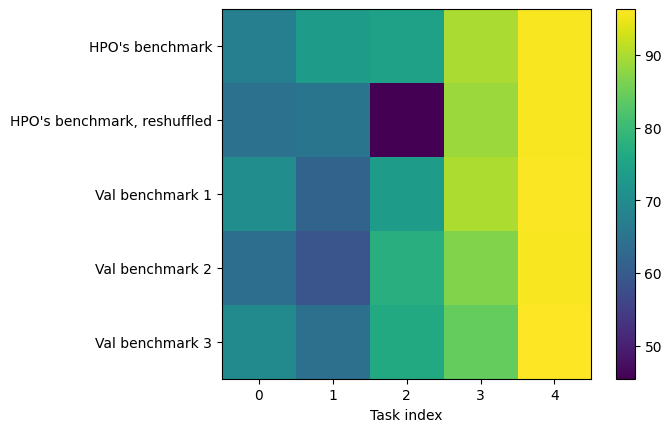

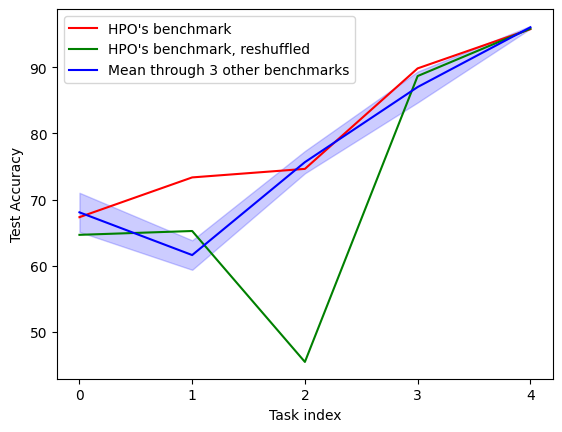

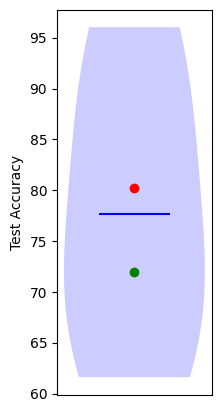

In [10]:
visualize_validation(val_accs_matrix, test_accs_matrix, visualization_settings, HPO_settings, method_settings, benchmark_settings)

## Save results matrices

In [11]:
if save_results :
    np.savetxt('Results/test_accs_matrix.csv', test_accs_matrix)
    np.savetxt('Results/val_accs_matrix.csv', val_accs_matrix)